Initialization

The use of three lines of code on top of  notebook as it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [4]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [57]:
# #@ IMPORTING MODULES: UNCOMMENT BELOW:
# !pip install transformers[sentencepiece]
# !pip install datasets
# !pip install umap-learn

In [6]:
#@ DOWNLOADING DATASETS FROM HUGGING FACE HUB
from datasets import list_datasets
from datasets import load_dataset
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer
from transformers import DistilBertTokenizer
from transformers import AutoModel
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#@ INITIALIZING THE DATASETS
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 11155 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [58]:
#@ LOADING EMOTION DATASET                                                      
emotions = load_dataset("emotion")                                              # loading dataset
emotions                                                                        # inspecting dataset

  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [9]:
#@ INSPECTING DATASET
train_ds = emotions["train"]
print(train_ds)
print(len(train_ds))
print(train_ds[0])
print(train_ds.column_names)


Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})
16000
{'text': 'i didnt feel humiliated', 'label': 0}
['text', 'label']


In [10]:
#@ INSPECTING DATASET
print(train_ds.features)
print(train_ds[:5])
print(train_ds["text"][:5])

{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}
{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}
['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


How to load datasets in various formats?
- For CSV `load_dataset("csv", data_files="my_file.csv")`
- For text `load_dataset("text", data_files="my_file.txt")`
- For json `load_dataset("json", data_files="my_file.json")`

If datasets need to be downloaded from an URL, Alternative way to download the dataset is :
 - `dataset_url = "enter_your_url_here"`
 - `!wget {dataset_url}`

In [11]:
#@ IMPLEMENTATION OF DATASET FROM LOCAL STORAGE OR FROM URL https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt"
dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt"
!wget {dataset_url}

--2022-10-06 11:29:05--  https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/1pzkadrvffbqw6o/train.txt [following]
--2022-10-06 11:29:06--  https://www.dropbox.com/s/raw/1pzkadrvffbqw6o/train.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc124b12ec0fc47d525046386899.dl.dropboxusercontent.com/cd/0/inline/BuRN-7yfN19UPuN9lEPlCnDOY6AKmj_r010Jyf4NwiF2jzqKZEuz3G85MEgCvMC2RwfYR2lCfS47pjsQwXNDsp2pZ2g8cpdZmzLawJ7SYEfU7tteactriJZCzkQyBCMMcbejCoUgy-D4MjG6-Uqv1rZAc-LfSkIYJUK98nE3DgvMXA/file# [following]
--2022-10-06 11:29:06--  https://uc124b12ec0fc47d525046386899.dl.dropboxusercontent.com/cd/0/inline/BuRN-7yfN19UPuN9lEPlCnDOY6AKmj_r010Jyf4NwiF2jzqKZEuz3G85MEgCvMC2RwfYR2lCfS47pjsQwXNDsp

In [12]:
#@ INSPECTING DATASET DOWNLOADED FROM DROPBOX
!head -n 1 train.txt

i didnt feel humiliated;sadness


In [59]:
#@ IF THE DATASET IS TO BE LOADED LOCALLY AND REMOTE
local_dataset = load_dataset("csv", data_files="train.txt", sep=";", names=["text","label"])              # loading dataset locally
remote_dataset = load_dataset("csv", data_files="https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt", sep=";", names=["text","label"])
remote_dataset

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 379
    })
})

**From Datasets to Dataframes**

In [14]:
#@ INITIALIZING PANDAS DATAFRAME
emotions.set_format(type="pandas")                                              # Change data format        
df = emotions["train"][:]                                                       # Initializing dataframe    
df.head()                                                                              # Insptecting dataframe

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [15]:
#@ INITIALIZING LABEL NAMES
def label_int2str(row):                                                         # function to convert int to string
  return emotions["train"].features["label"].int2str(row)                                         
df["label_name"] = df["label"].apply(label_int2str)                             # updating the dataframe
df.head()                                                                       # inspecting new dataframe

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


**Looking at the Class Distribution**

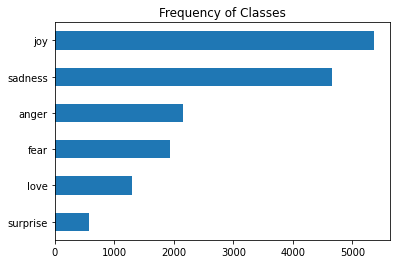

In [16]:
#@ INSPECTING CLASS DISTRIBUTION
df["label_name"].value_counts(ascending=True).plot.barh()                       # creating barplot
plt.title("Frequency of Classes")                                               # adding title to the plot  
plt.show()                                                                      # visualizaton of plot  

❗**Note** : we can see that the dataset is heavily imbalanced; the joy and sadness
classes appear frequently, whereas love and surprise are about 5–10 times rarer.
There are several ways to deal with imbalanced data, including:

- Randomly oversample the minority class.
- Randomly undersample the majority class.
- Gather more labeled data from the underrepresented classes.
<br> 🏹 More details [Imbalanced-learn library](https://oreil.ly/5XBhb)

**Tweet Length**
<br>Transformer models have a maximum input sequence length that is referred to as the
maximum context size. For applications using DistilBERT, the maximum context size
is 512 tokens, which amounts to a few paragraphs of text

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


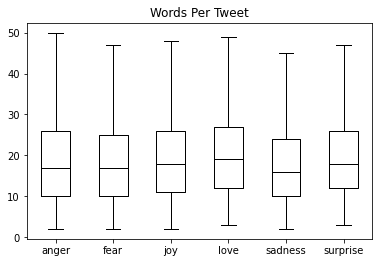

In [17]:
#@ INSPECTING TWEETS LENGTH
df["Words Per Tweet"] = df["text"].str.split().apply(len)                       # inspecting input sequence length
df.boxplot("Words Per Tweet", by="label_name", grid=False,                      # create box plot
           showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

Convert these raw texts into a format suitable for
Transformers 🤗 ! While we’re at it, let’s also reset the output format of our dataset
since we don’t need the DataFrame format anymore:

In [18]:
#@ RESETTING THE FORMATS
emotions.reset_format()

**From Text to Tokens**
<br>**Transformer models** like DistilBERT cannot receive raw strings as input; instead, they
assume the text has been tokenized and encoded as numerical vectors.
<br>**Tokenization** is
the step of breaking down a string into the atomic units used in the model. There are
several tokenization strategies one can adopt, and the optimal splitting of words into
subunits is usually learned from the corpus.
<br>**Numericalization** is the process of converting tokens into integer.

**Character Tokenization**

In [19]:
#@ IMPLEMENTATION OF CHARACTER TOKENIZATION
text = "Tokenizing text is a core task of NLP"
tokenized_text = list(text)                                                     # character tokenization
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P']


In [20]:
#@ INITIALIZING NUMERICALIZATION | CONVERTING TOKENS INTO NUMERICAL VALUES
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, 'L': 1, 'N': 2, 'P': 3, 'T': 4, 'a': 5, 'c': 6, 'e': 7, 'f': 8, 'g': 9, 'i': 10, 'k': 11, 'n': 12, 'o': 13, 'r': 14, 's': 15, 't': 16, 'x': 17, 'z': 18}


In [21]:
#@ NUMERICALIZATION 
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[4, 13, 11, 7, 12, 10, 18, 10, 12, 9, 0, 16, 7, 17, 16, 0, 10, 15, 0, 5, 0, 6, 13, 14, 7, 0, 16, 5, 15, 11, 0, 13, 8, 0, 2, 1, 3]


The last step is to convert input_ids to a 2D tensor of one-hot vectors.
One-hot vectors are frequently used in machine learning to encode categorical data,
which can be either ordinal or nominal.

In [22]:
#@ INITILIZING ONE HOT ENCODING
categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


The problem with this approach is that it creates a fictitious ordering between the
names, and neural networks are really good at learning these kinds of relationships.
So instead, we can create a new column for each category and assign a 1 where the
category is true, and a 0 otherwise.

In [23]:
#@ INITIALIZING ONE HOT ENCODING
pd.get_dummies(categorical_df["Name"])                                          # implementation of one hot vectors

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [24]:
#@ ONE HOT ENCODING WITH PYTORCH
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([37, 19])

For each of the 37 input tokens, we have a one hot vector with 19 dimensions, since our vocabulary consists of 19 unique characters

In [25]:
#@ INSPECTING CHARACTER LEVEL TOKENIZATION
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: tensor([ 4, 13, 11,  7, 12, 10, 18, 10, 12,  9,  0, 16,  7, 17, 16,  0, 10, 15,
         0,  5,  0,  6, 13, 14,  7,  0, 16,  5, 15, 11,  0, 13,  8,  0,  2,  1,
         3])
One-hot: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


📒 **Note**: From our simple example we can see that character-level tokenization ignores any
structure in the text and treats the whole string as a stream of characters. <br>Although
this helps deal with misspellings and rare words, the main drawback is that linguistic
structures such as words need to be learned from the data. <br>This requires significant
compute, memory, and data. For this reason, character tokenization is rarely used in
practice.

**Word Tokenization**
<br> Instead of splitting the text into characters, we can split it into words and map each
word to an integer.

In [26]:
#@ INITIALIZING WORD TOKENIZATION
tokenized_text = text.split()                                                   # using white space to tokenize it by the use of split() function
print(tokenized_text)            

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP']


**Subword Tokenization**
<br>The basic idea behind subword tokenization is to 
- combine the best aspects of character and word tokenization.
- split rare words into smaller
units to allow the model to deal with complex words and misspellings.
- keep frequent words as unique entities so that we can keep the
length of our inputs to a manageable size.

In [27]:
#@ INITIALIZING SUBWORK TOKENIZATION
model_ckpt = "distilbert-base-uncased"                                          # initializing model checkpoint
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

The **AutoTokenizer** class belongs to a larger set of “auto” classes whose job is to automatically retrieve the model’s configuration, pretrained weights, or vocabulary from the name of the checkpoint.
<br> if you wish to load the specific **class manually** you can do so as well. For example, we could have loaded the **DistilBERT tokenizer** as follows:

In [28]:
#@ DISTILBERT TOKENIZER INITIALIZATION
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)          # DistilBertTokenier initialization

In [29]:
#@ IMPLEMENTATION OF BERT TOKENIZER
encoded_text = tokenizer(text)                                                  # Initializing tokenization
print(encoded_text)                                                             # Inspection
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)                # Converting ids into tokens
print(tokens)                                                                   # Inspecting the output
print(tokenizer.convert_tokens_to_string(tokens))                               # Converting tokens into string

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '[SEP]']
[CLS] tokenizing text is a core task of nlp [SEP]


- some special [CLS] and [SEP] tokens have
been added to the start and end of the sequence. These tokens differ from model to model, but their main role is to indicate the start and end of a sequence.
- the
tokens have each been lowercased, which is a feature of this particular checkpoint.
- we can see that “tokenizing” and “NLP” have been split into two tokens,
which makes sense since they are not common words. The ## prefix in ##izing and ##p means that the preceding string is not whitespace;

**any token with this prefix
should be merged with the previous token when you convert the tokens back to a
string.**

In [30]:
#@ INSPECTING FEATURES OF TOKENIZER
print(tokenizer.vocab_size)                                                     # Vocabulary size
print(tokenizer.model_max_length)                                               # Inspecting model's maxmimum context size
print(tokenizer.model_input_names)                                              # Inspecting keys        


30522
512
['input_ids', 'attention_mask']


**Tokenizing the Whole Dataset**

In [31]:
#@ FUNCTION TO TOKENIZE THE WHOLE DATASET
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


📒 **Note**: 
<br> The result of padding: the first element of input_ids is shorter than
the second, so zeros have been added to that element to make them the same length.
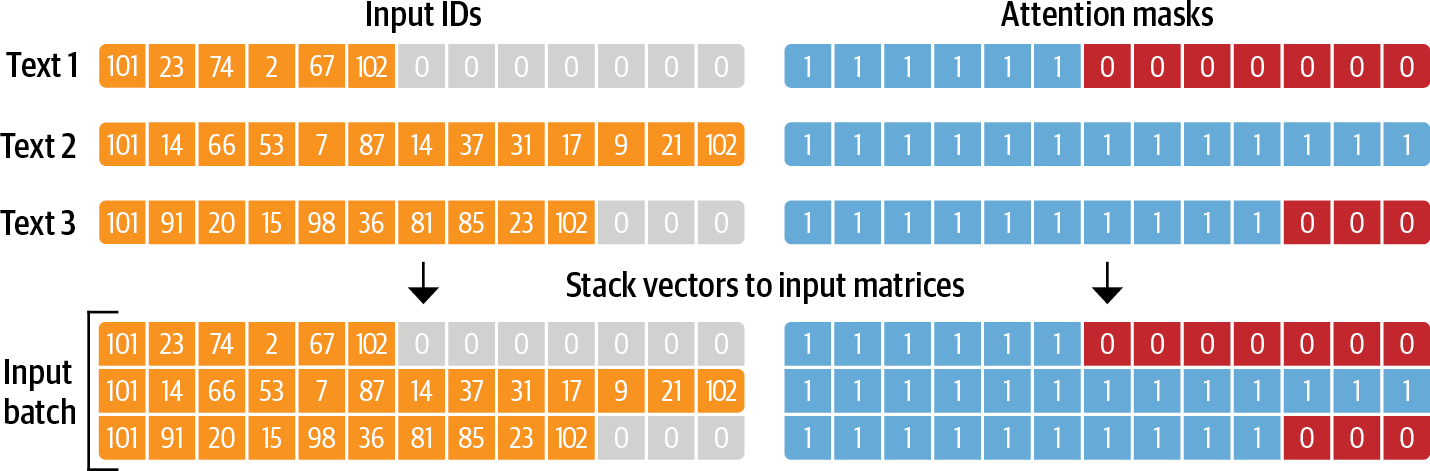

In [32]:
#@ TOKENIZING THE WHOLE DATASET
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)        # Encoding whole dataset
print(emotions_encoded["train"].column_names)


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

['text', 'label', 'input_ids', 'attention_mask']


**Transformers as Feature Extractors**

In [33]:
#@ TRANSFORMERS AS A FEATURE EXTRACTORS
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)
#@ IF TENSORFLOW IS USED
# from transformers import TFAutoModel
# tf_model = TFAutoModel.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [34]:
#@ INITIALIZING TOKENIZATION: EXAMPLE
text = "I want to visit Nepal."
inputs = tokenizer(text, return_tensors="pt")                                   # Getting encoded tensors
print(f"input tensor shape: {inputs['input_ids'].size()}")


input tensor shape: torch.Size([1, 8])


Tensor shape [batch_size, n_tokens]

In [35]:
#@ IMPLEMENTATION OF THE MODEL
inputs = {k:v.to(device) for k,v in inputs.items()}                             # Initializing gpu tensors
with torch.no_grad():                                                           
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[ 0.1546, -0.0911, -0.0231,  ..., -0.0712,  0.3609,  0.1749],
         [ 0.6993, -0.0682, -0.2175,  ...,  0.0278,  0.4809,  0.1841],
         [ 0.7189,  0.0244,  0.6199,  ..., -0.5452,  0.0448,  0.0669],
         ...,
         [ 0.8427, -0.0212, -0.3295,  ..., -0.4322, -0.2421, -0.3725],
         [ 0.6529, -0.0734, -0.4964,  ...,  0.1613, -0.2189, -0.7544],
         [ 0.6215,  0.1734,  0.0506,  ...,  0.1288, -0.0066, -0.5436]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [36]:
#@ INSPECTING MODEL OUTPUT
print(outputs.last_hidden_state.size())
print(outputs.last_hidden_state[:,0].size())


torch.Size([1, 8, 768])
torch.Size([1, 768])


So now lets extract last hidden state for whole dataset by creating a new hidden_state column that stores all these vectos.

In [37]:
#@ EXTRACTING HIDDEN STATES FROM WHOLE DATASET
def extract_hidden_states(batch):
  # Place model inputs on GPU
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}
  # Extract last hidden states
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  # Return vector for [CLS] token
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [38]:
#@ EXTRACTING HIDDEN STATES FROM WHOLE DATASET
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)
emotions_hidden["train"].column_names

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

**Creating a feature matrix**
<br> hidden states as an input features
<br> labels as targets

In [39]:
#@ CREATING FEATURES MATRIX
X_train = np.array(emotions_hidden["train"]["hidden_state"])                    # Inspecting training sets
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])               # Inspecting validation sets    
y_train = np.array(emotions_hidden["train"]["label"])                           # Inspecting training labels
y_valid = np.array(emotions_hidden["validation"]["label"])                      # Inspecting validation labels
X_train.shape, X_valid.shape                                                    # Inspecting size

((16000, 768), (2000, 768))

**Visualizing datasets**

In [40]:
#@ VISUALIZATION OF TRAINING DATASETS
X_scaled = MinMaxScaler().fit_transform(X_train)                                # Scale features to [0,1] range
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)                    # Initialze and fit UMAP
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])                    # Create a DataFrame of 2D Embeddings
df_emb["label"] = y_train
df_emb.head()


,X,Y,label
0,4.140328,6.606538,0
1,-3.057151,6.175980,0
2,5.260786,3.183974,3
3,-2.438195,4.027859,2
4,-3.392851,4.192081,3


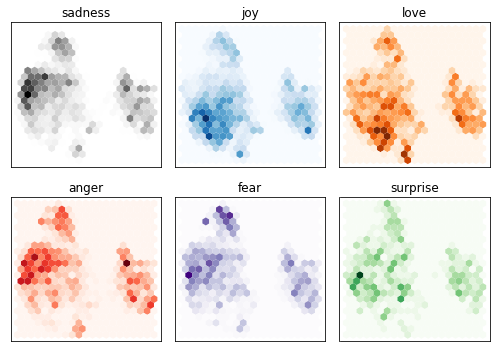

In [41]:
#@ VISUALIZE THE DATASET
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples","Greens"]
labels = emotions["train"].features["label"].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

**Training a simple classifier**

In [42]:
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

In [43]:
#@ TRAINING DUMMY CLASSIFIERS
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

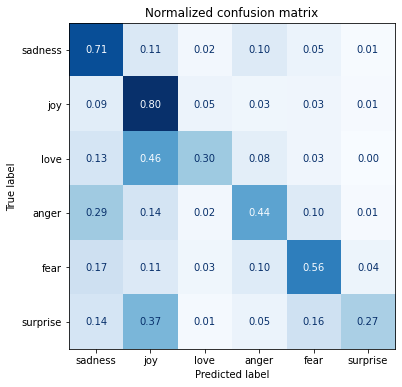

In [44]:
#@ INSPECTING CONFUSION MATRIX
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

#@ INSPECTING CONFUSION MATRIX
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

**Fine-Tuning Transformers**
<br> No need to use the hidden states as fixed features.
<br> When using the fine-tuning approach the whole DistilBERT model is trained
along with the classification head

In [45]:
#@ IMPORTING THE LIBRARY FRO FINE-TUNING WITH DISTILBERT
from transformers import AutoModelForSequenceClassification


In [46]:
#@ INITIALIZING PRETRAINED MODEL
num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier

**Defining the performance metrics**

In [47]:
#@ IMPORTING THE LIBRARY
from sklearn.metrics import accuracy_score, f1_score

In [48]:
#@ FUNCTION TO COMPUTE METRICS
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

**Training the model**

In [49]:
#@ IMPORTING LIBRARY
from transformers import Trainer, TrainingArguments
from transformers import Trainer
from huggingface_hub import notebook_login

In [50]:
#@ INITIALIZING TRAINING ARGUMENTS
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                num_train_epochs=2,
                learning_rate=2e-5,
                per_device_train_batch_size=batch_size,
                per_device_eval_batch_size=batch_size,
                weight_decay=0.01,
                evaluation_strategy="epoch",
                disable_tqdm=False,
                logging_steps=logging_steps,
                push_to_hub=False,
                log_level="error")

In [51]:
#@ TRAINING MODEL:
trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=distilbert_tokenizer)                                      # Initializing trainer.
trainer.train(); 

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.886600,0.344583,0.897000,0.892615
2,0.267600,0.223830,0.926500,0.926471


In [52]:
#@ INITIALIZING MODEL EVALUATION: 
preds_output = trainer.predict(emotions_encoded["validation"])                  # Generating predictions.
print(preds_output.metrics)                                                     # Inspecting metrics.

{'test_loss': 0.223830446600914, 'test_accuracy': 0.9265, 'test_f1': 0.9264711252078356, 'test_runtime': 4.4318, 'test_samples_per_second': 451.288, 'test_steps_per_second': 7.221}


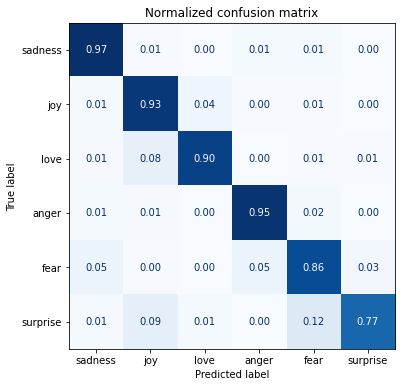

In [53]:
#@ PLOTTING CONFUSION MATRIX:
y_preds = np.argmax(preds_output.predictions, axis=1)                           # Generating predictions.
plot_confusion_matrix(y_preds, y_valid, labels)                                 # Plotting confusion matrix.

In [54]:
#@ DEFINING FUNCTION FOR ERROR ANALYSIS:
def forward_pass_with_label(batch):                             # Defining function. 
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}              # Placing into gpu.
    
    with torch.no_grad():
        output = model(**inputs)                                # Getting output predictions.
        pred_label = torch.argmax(output.logits, axis=-1)       # Getting predictions label.
        loss = F.cross_entropy(output.logits, 
                               batch["label"].to(device),
                               reduction="none")                # Calculating loss. 
        return {"loss": loss.cpu().numpy(),
                "predicted_label": pred_label.cpu().numpy()}    # Placing outputs on cpu.

In [55]:
#@ COMPUTING LOSS:
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16
)                                                                               # Implementation.
emotions_encoded.set_format("pandas")                                           # Changing format.
cols = ["text", "label", "predicted_label", "loss"]                             # Initialization. 
df_test = emotions_encoded["validation"][:][cols]                               # Initializing dataframe.
df_test["label"] = df_test["label"].apply(label_int2str)                        # Converting integers into strings.
df_test["predicted_label"] = df_test["predicted_label"].apply(label_int2str)    # Converting integers into strings.
df_test.sort_values("loss", ascending=False).head()                             # Inspection.


  0%|          | 0/125 [00:00<?, ?ba/s]

,text,label,predicted_label,loss
882,i feel badly about reneging on my commitment t...,love,sadness,5.324295
465,i would eventually go in to these stores but i...,joy,fear,5.289501
1801,i feel that he was being overshadowed by the s...,love,sadness,5.161278
1274,i am going to several holiday parties and i ca...,joy,sadness,5.103940
1950,i as representative of everything thats wrong ...,surprise,sadness,5.053280


In [56]:
#@ INSPECTION:
df_test.sort_values("loss", ascending=True).head()                             # Inspection.

,text,label,predicted_label,loss
1601,i feel so ungrateful when thinking saying thes...,sadness,sadness,0.019291
69,i have no extra money im worried all of the ti...,sadness,sadness,0.019291
1368,i started this blog with pure intentions i mus...,sadness,sadness,0.019411
697,i was missing him desperately and feeling idio...,sadness,sadness,0.019540
392,i remember feeling disheartened one day when w...,sadness,sadness,0.019571
